# Assignment 3: Regression and Regularization


1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

- You may need to clean and transform the data, including feature engineering, creating dummy variables, or using           dimensionality reduction.
- Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [1262]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [1263]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [1264]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1266]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [1267]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Count the values with .5 in 'bathrooms' column
bathrooms_count = df[df['bathrooms'] % 1 == 0.5].shape[0]

# Count the values with .5 in 'floors' column
floors_count = df[df['floors'] % 1 == 0.5].shape[0]

# Print the counts
print("Count of values with .5 in 'bathrooms':", bathrooms_count)
print("Count of values with .5 in 'floors':", floors_count)

Count of values with .5 in 'bathrooms': 7674
Count of values with .5 in 'floors': 2079


The count provided above indicates a considerable quantity of bathrooms and floors with a decimal value of 0.5. Therefore, I will maintain these values without making any changes.

---------------------------------------------------------  Analysis at the individual data point level.  --------------------------------------

1. Price

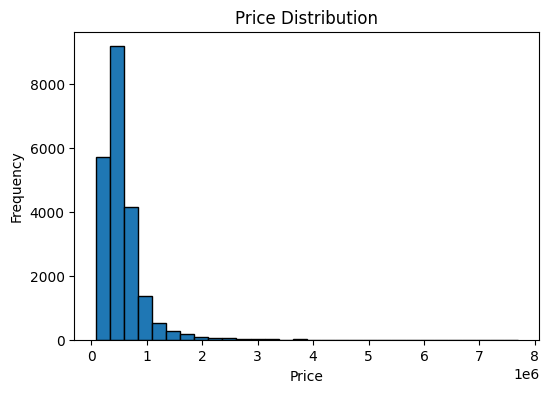

In [1268]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [1269]:
print("Mean:",df['price'].mean(),"$")
print("Median:",df['price'].median(),"$")
print("Max:",df['price'].max(),"$")
print("Min:",df['price'].min(),"$")

Mean: 540088.1417665294 $
Median: 450000.0 $
Max: 7700000.0 $
Min: 75000.0 $


In [1270]:
#df[(df['price'] >= 4000000)]


It is evident that the price data displays significant skewness and a high degree of kurtosis.

2. Bathroom

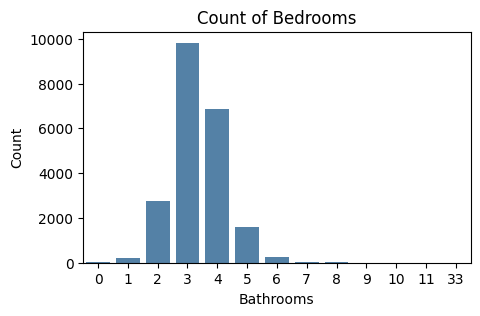

In [1271]:
bedroom_counts = df['bedrooms'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='steelblue')
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

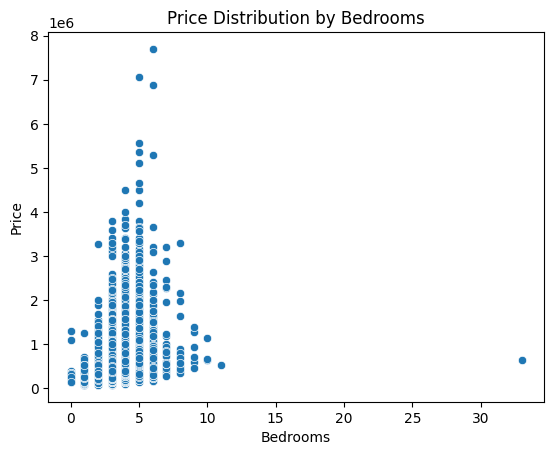

In [1272]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')
plt.show()

In [1273]:
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [1274]:
df_copy= df[(df['zipcode'] == 98103)]
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


In [1275]:
df = df.drop(df[df['bedrooms'] == 33].index)

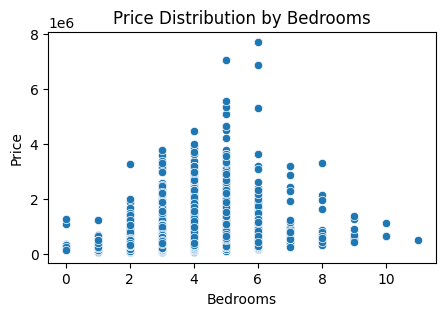

In [1276]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')
plt.show()

In this particular area, houses usually have three bedrooms. Interestingly, there doesn't appear to be a significant price difference between properties with 33 bedrooms and other houses in the same area. Additionally, the median square footage of living space in this area is very close to the square footage of living space in this specific house. This observation raises the possibility of a data entry error. Consequently, we decided to exclude this data point and proceeded to visualize the relationship between price and the number of bathrooms.

3. Bathrooms

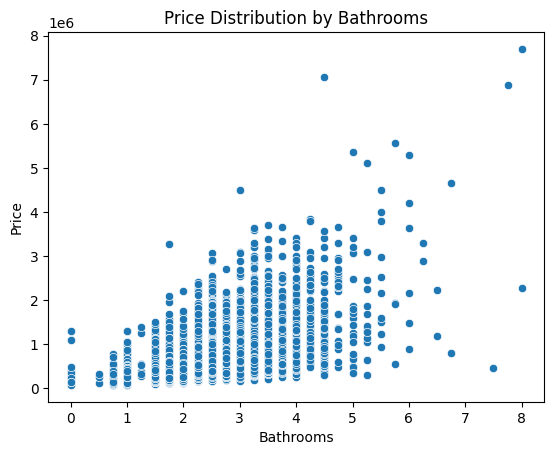

In [1277]:
sns.scatterplot(data = df,x='bathrooms', y='price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')
plt.show()

In [1278]:
df[(df['bathrooms'] >= 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [1279]:
df[(df['bathrooms'] == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [1280]:
df = df.drop(df[df['bathrooms'] == 0].index)
df = df.drop(df[df['bathrooms'] >= 7].index)

I excluded houses from the analysis that had zero bathrooms or more than seven bathrooms.

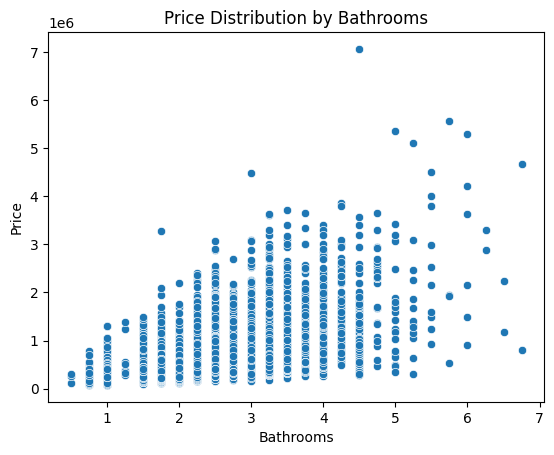

In [1281]:
sns.scatterplot(data = df,x='bathrooms', y='price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')
plt.show()

Let's create visual representations that illustrate the relationship between the remaining columns and the price variable.

In [1282]:
def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

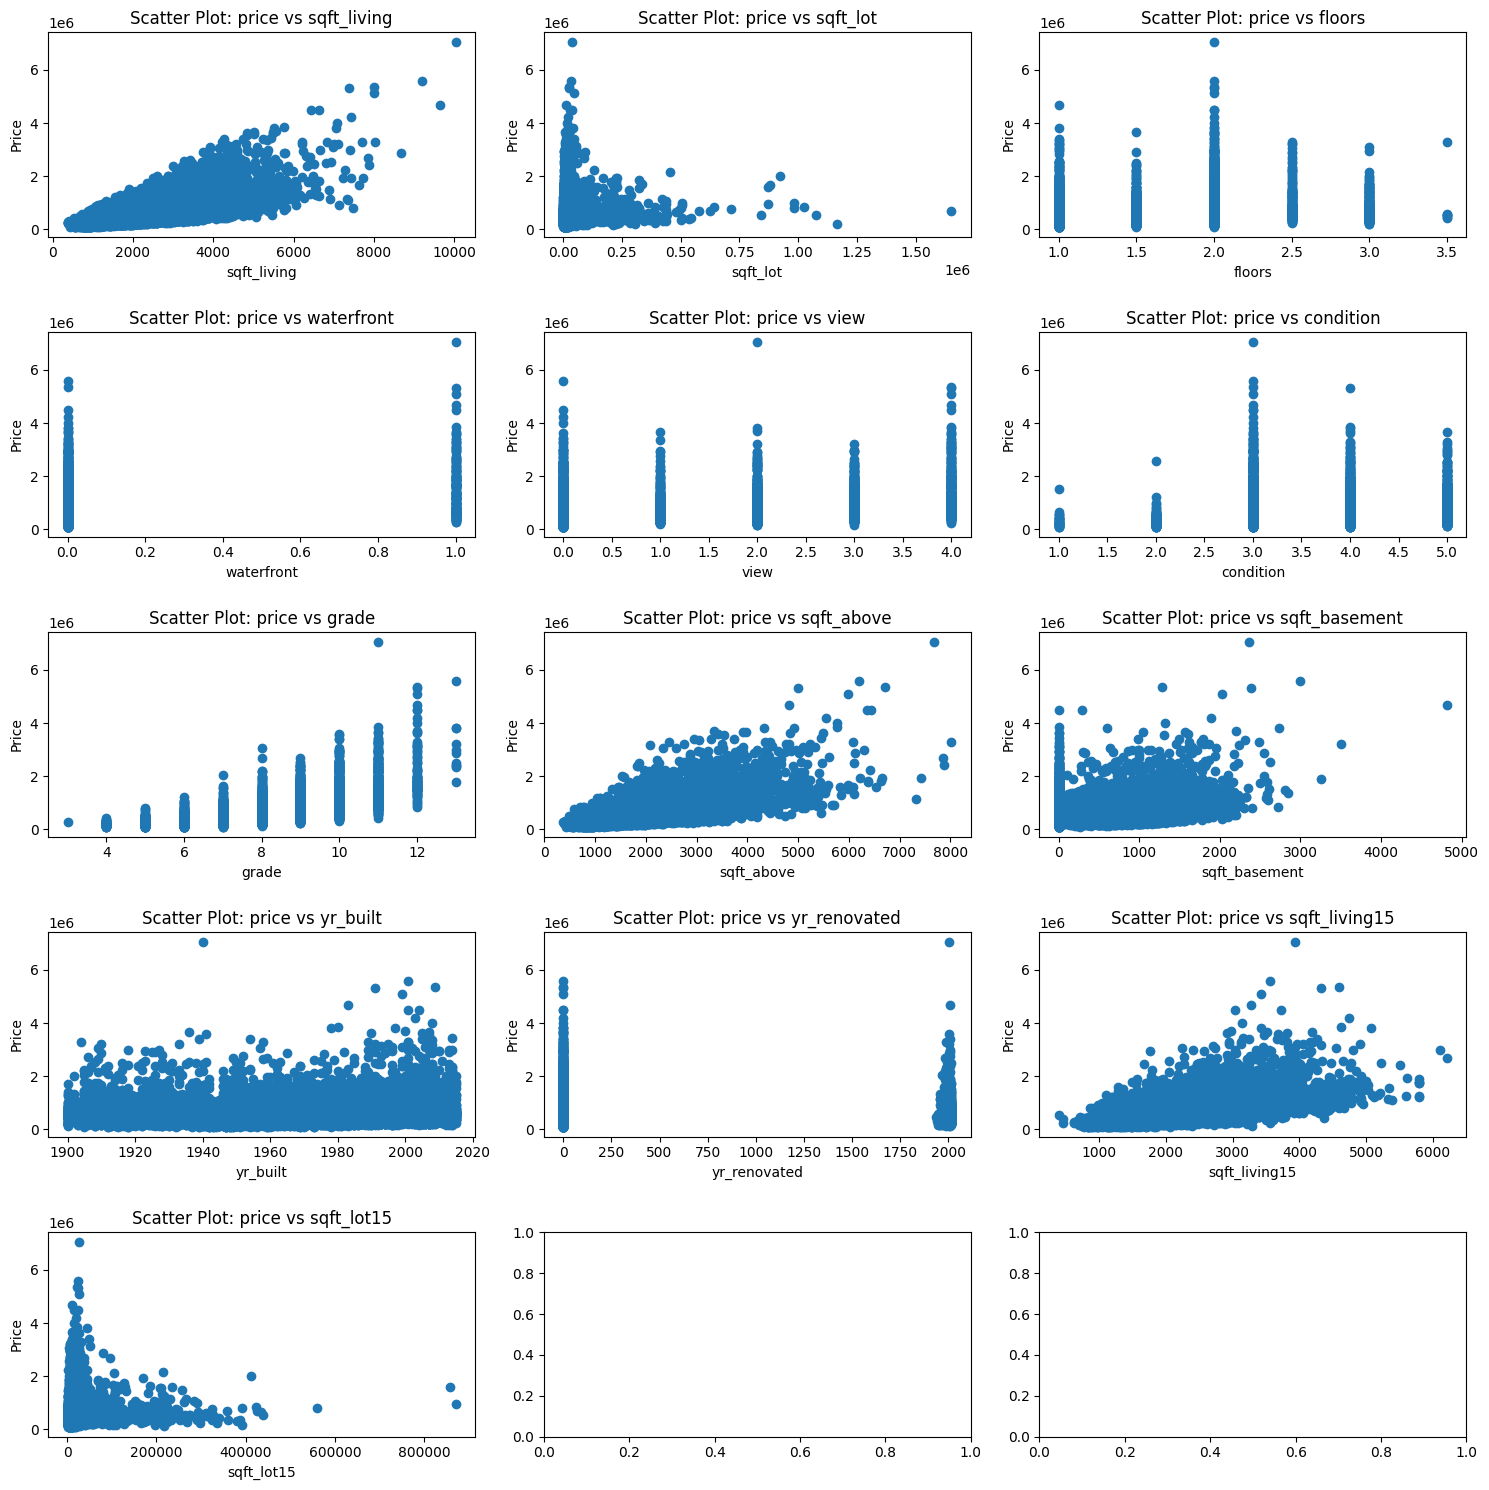

In [1283]:
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])
plt.tight_layout()
plt.show()

<Figure size 200x100 with 0 Axes>

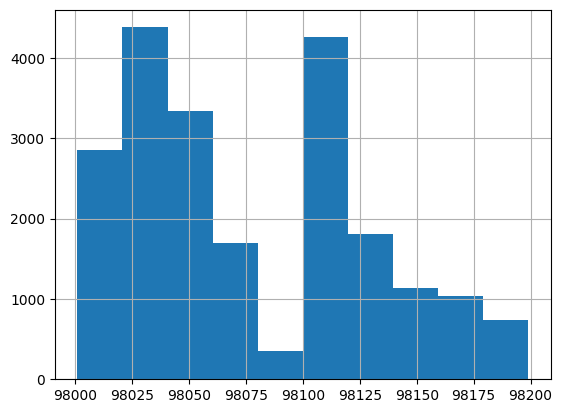

<Figure size 200x100 with 0 Axes>

In [1284]:
df["zipcode"].hist()
plt.figure(figsize=(2,1))

<Axes: xlabel='lat', ylabel='long'>

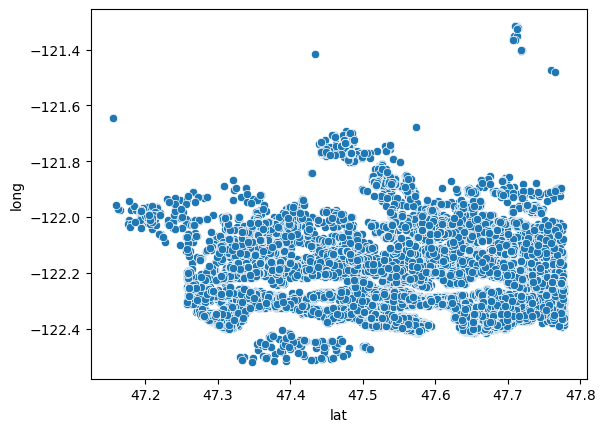

In [1285]:
sns.scatterplot(data = df, x = "lat", y = "long")

The overall data appears to follow a normal distribution. To remove outliers from specific columns, we can utilize the z-score method.

In [1286]:
#'bedrooms', 'bathrooms', 
def remove_outliers(df):
    variables = ['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [1287]:
df = remove_outliers(df)

In [1288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19769 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19769 non-null  int64         
 1   date           19769 non-null  datetime64[ns]
 2   price          19769 non-null  float64       
 3   bedrooms       19769 non-null  int64         
 4   bathrooms      19769 non-null  float64       
 5   sqft_living    19769 non-null  int64         
 6   sqft_lot       19769 non-null  int64         
 7   floors         19769 non-null  float64       
 8   waterfront     19769 non-null  int64         
 9   view           19769 non-null  int64         
 10  condition      19769 non-null  int64         
 11  grade          19769 non-null  int64         
 12  sqft_above     19769 non-null  int64         
 13  sqft_basement  19769 non-null  int64         
 14  yr_built       19769 non-null  int64         
 15  yr_renovated   19769 non

In [1289]:
((21608-19769)/21608)*100


8.510736764161422

Approximately 8.5 percent of the data was lost during the process.

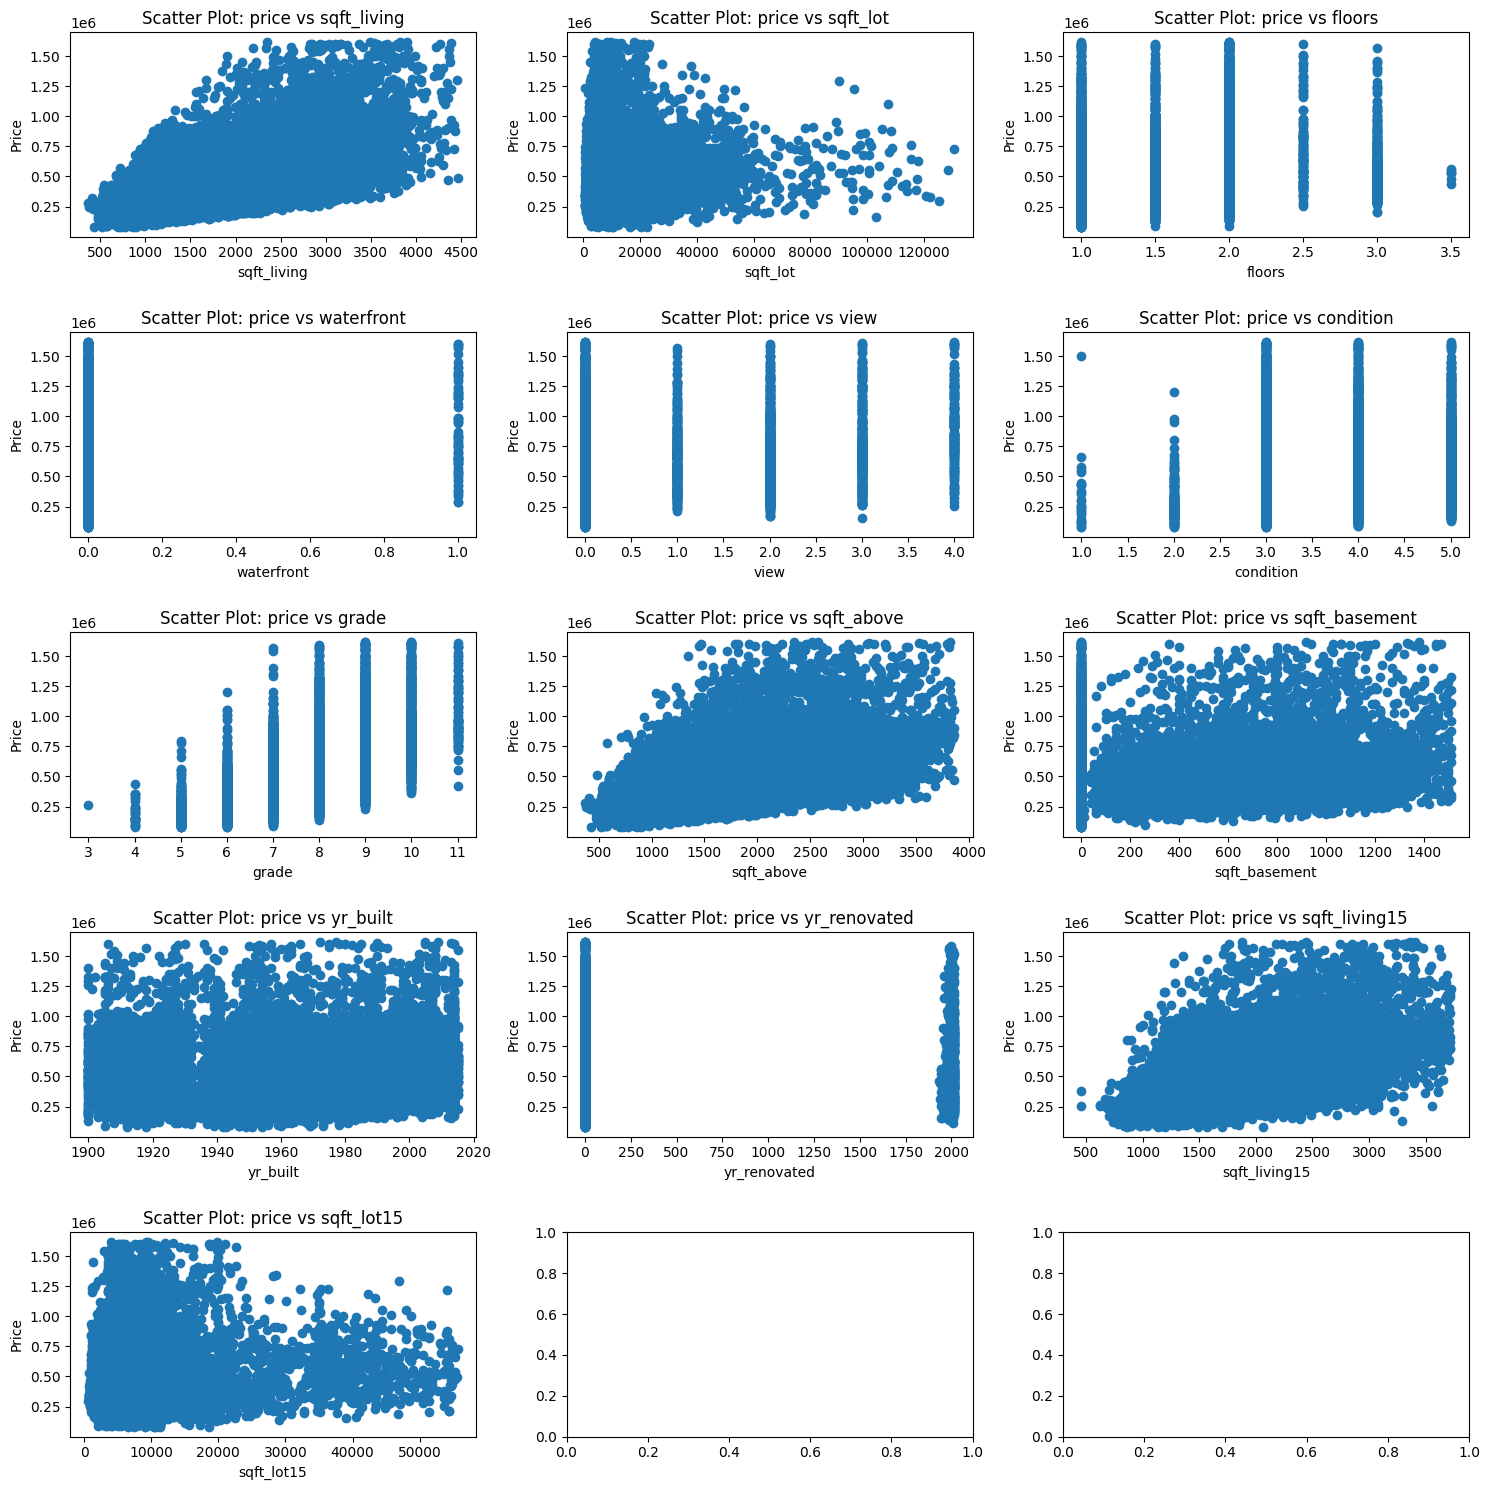

In [1290]:
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

After the removal of certain data points, the distribution of the remaining data appears to be more balanced and evenly distributed.

Let's create few new Variables.

In [1291]:
price_persqft_zipcode = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(price_persqft_zipcode.rename('price_persqft_zipcode'), left_on='zipcode', right_index=True)
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['house_age_atSale'] = (df['Year'] - df['yr_built'])


In [1292]:
df[(df['house_age_atSale'] < 0) &(df['price'] >150000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_persqft_zipcode,month,Year,house_age_atSale
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,0,98103,47.6725,-122.330,1800,4560,355.724166,7,2014,-1
21262,5694500840,2014-11-25,559000.0,2,3.00,1650,960,3.0,0,0,...,0,98103,47.6611,-122.346,1650,3000,355.724166,11,2014,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,0,98133,47.7384,-122.348,1970,18110,240.911021,8,2014,-1
21372,6169901185,2014-05-20,490000.0,5,3.50,4460,2975,3.0,0,2,...,0,98119,47.6313,-122.370,2490,4231,408.874105,5,2014,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,0,98122,47.6074,-122.305,1480,3600,350.708059,6,2014,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,0,98122,47.6047,-122.305,1380,1495,350.708059,8,2014,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,0,98144,47.5756,-122.316,1440,4800,297.775429,10,2014,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,0,98144,47.6001,-122.298,1320,1852,297.775429,6,2014,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,0,98144,47.5951,-122.301,1350,3000,297.775429,7,2014,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,0,98199,47.6514,-122.385,1570,6000,356.489415,8,2014,-1


The table above indicates that a significant number of high-priced houses were sold prior to their construction. This observation aligns with expectations and is not surprising.

In [1293]:
def grade_cat(x):
    if x <= 3:
        return 1
    elif x >= 4 and x <=6:
        return 2
    elif x >= 7 and x < 10:
        return 3
    elif x >= 10:
        return 4
    else:
        return 'Missing'

In [1294]:
df['grade_category'] = df['grade'].apply(grade_cat)

In [1295]:
def Floor_cat(x):
    if x >= 0 and x < 2:
        return 1
    elif x >= 2 and x < 3:
        return 2
    elif x >= 3 and x < 4:
        return 3
    else:
        return 'Missing'

In [1296]:
df['Floor_category'] = df['floors'].apply(Floor_cat)

In [1297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19769 entries, 0 to 18892
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19769 non-null  int64         
 1   date                   19769 non-null  datetime64[ns]
 2   price                  19769 non-null  float64       
 3   bedrooms               19769 non-null  int64         
 4   bathrooms              19769 non-null  float64       
 5   sqft_living            19769 non-null  int64         
 6   sqft_lot               19769 non-null  int64         
 7   floors                 19769 non-null  float64       
 8   waterfront             19769 non-null  int64         
 9   view                   19769 non-null  int64         
 10  condition              19769 non-null  int64         
 11  grade                  19769 non-null  int64         
 12  sqft_above             19769 non-null  int64         
 13  sqft_b

In [1298]:
df.drop(columns=['date','id'], inplace=True)

I have extracted the necessary information from the date column, and as the ID column is not needed for the analysis, it has been dropped from the dataset.

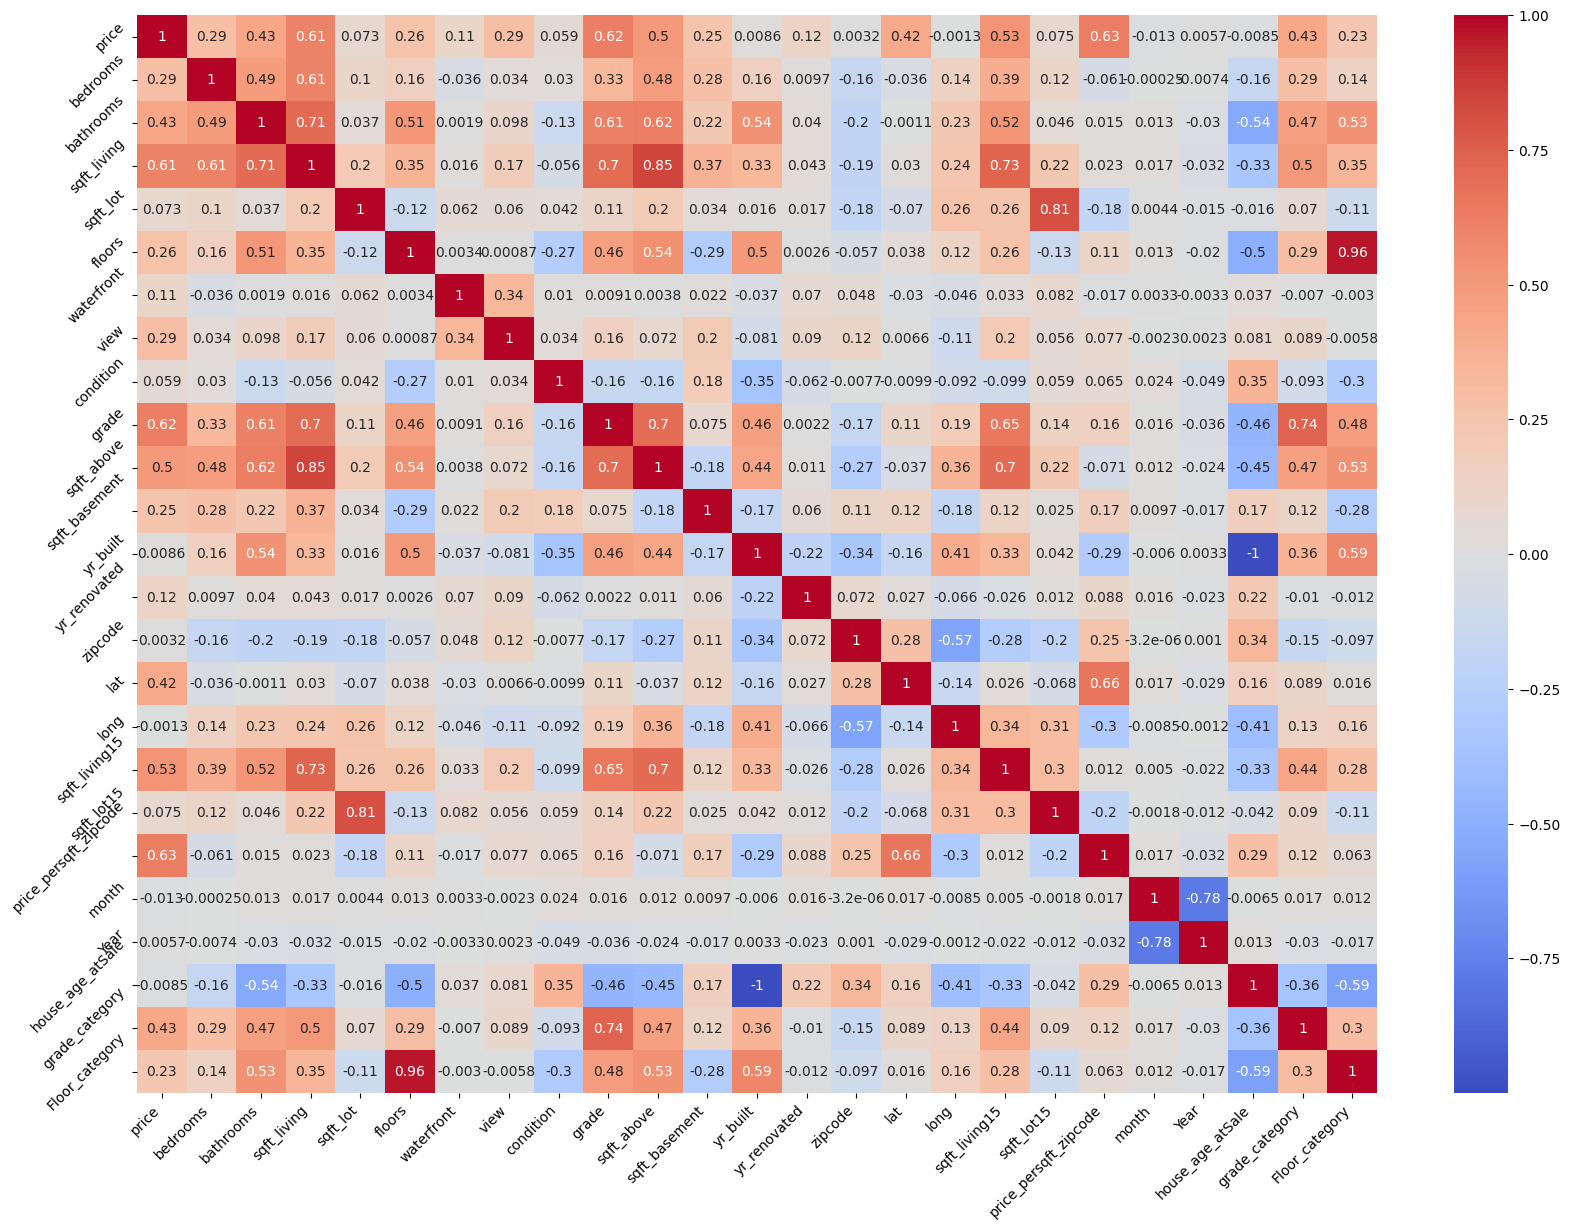

In [1299]:
#df_corr= df
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 14))  # Adjust the figsize according to your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x_tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y_tick labels
plt.show()

Still need to analyze this matrix

In [1300]:
results = ols("price ~ bedrooms + bathrooms + sqft_living +floors + waterfront + view + grade + sqft_above + sqft_basement + yr_renovated + zipcode + lat + sqft_living15 + sqft_lot15 + Year + house_age_atSale + grade_category + price_persqft_zipcode +Floor_category", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4889.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:40:19   Log-Likelihood:            -2.5598e+05
No. Observations:               19769   AIC:                         5.120e+05
Df Residuals:                   19750   BIC:                         5.122e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.012e+

In [1301]:
ols_pred_vals = results.predict(df[['bedrooms','bathrooms', 'sqft_living','floors','waterfront','view','grade','sqft_above', 'sqft_basement' ,'yr_renovated','zipcode','lat' , 'sqft_living15', 'sqft_lot15' , 'Year','house_age_atSale','grade_category','price_persqft_zipcode','Floor_category']])

In [1302]:
df_copy=df.copy()
res = pd.concat([ols_pred_vals.to_frame().rename(columns={0:'y_hat'}),df_copy['price']], axis=1)
res['error'] = res['y_hat'] - res['price']
res['sq_error'] = res['error']**2
np.sqrt(res['sq_error'].mean())


101707.2731197095

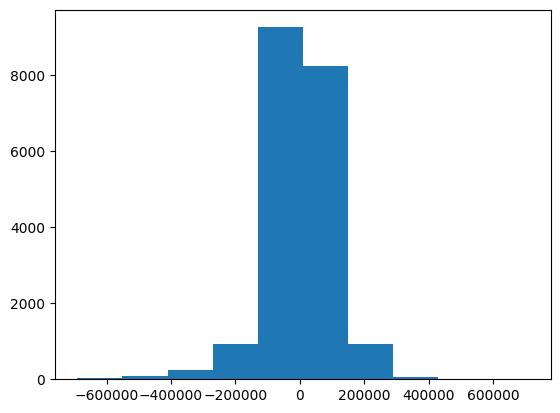

In [1303]:
plt.hist(res['error'])
plt.show()

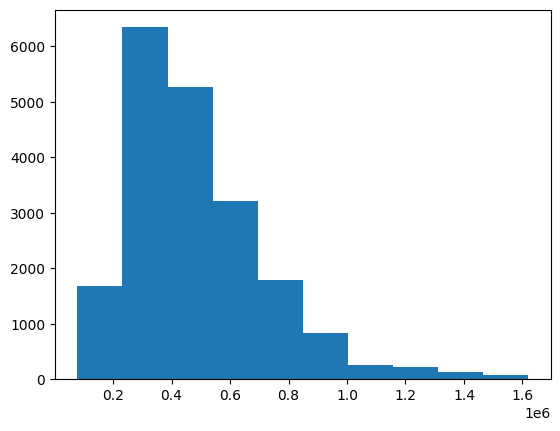

In [1304]:
plt.hist(df_copy['price'])
plt.show()

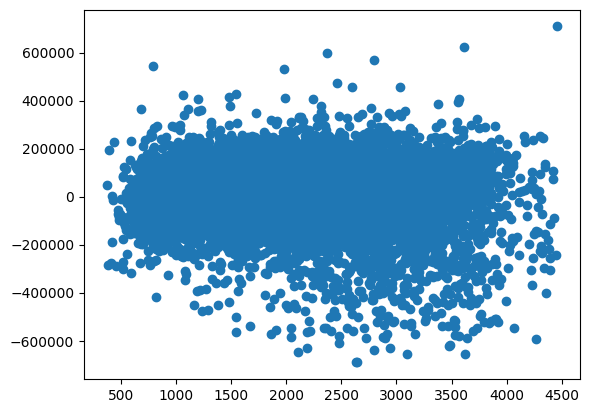

In [1321]:
plt.scatter(df['sqft_living'],res['error'])

In [1305]:
#categorical_features = ['floors','waterfront','bathrooms', 'bedrooms', 'view', 'grade','grade_category','Floor_category']
#numerical_features = ['sqft_living', 'sqft_above', 'sqft_basement','yr_renovated','price_persqft_zipcode' ,'zipcode', 'lat', 'sqft_living15', 'sqft_lot15','Year','house_age_atSale']
#target = 'price' 

In [1306]:
categorical_features = ['floors','waterfront', 'view','condition', 'grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_persqft_zipcode','month','Year','house_age_atSale']
target = 'price'

In [1308]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [1310]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(X_train, y_train)
pred_lr = linear_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_lr,y_test))

317163112798929.75

In [1311]:
''''alpha_values = [1,0.75,0.5,0.3,0.1,2,3]
alpha_mse = {}
for alpha in alpha_values:
    ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])
    ridge_regression.fit(X_train, y_train)
    pred_ridge = ridge_regression.predict(X_test)
    mse = np.sqrt(mean_squared_error(pred_ridge, y_test))
    alpha_mse[alpha] = mse
    print(f"Alpha = {alpha}, Mean Squared Error = {mse}")
    '''
ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=3))
    ])
ridge_regression.fit(X_train, y_train)
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge, y_test))

98057.18123921032

After evaluating various alpha values, it can be concluded that an alpha value of 3 yielded the most optimal result.

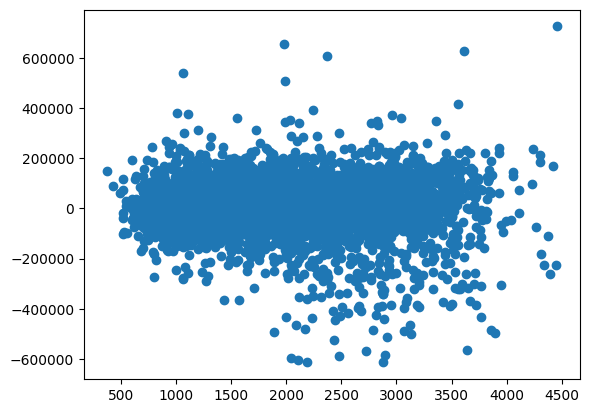

In [1328]:
ridgemodel_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridgemodel_pred['res'] = ridgemodel_pred['pred'] - ridgemodel_pred['price']
plt.scatter(X_test['sqft_living'],ridgemodel_pred['res'])

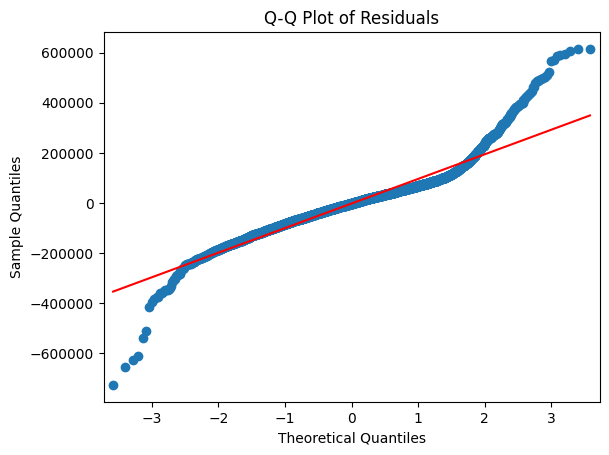

In [1312]:
residuals_ridge = y_test - pred_ridge
sm.qqplot(residuals_ridge, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [1313]:
'''
alpha_values = [1,0.75,0.5,0.3,0.1,2,3]
alpha_mse = {}
for alpha in alpha_values:
        lasso_regression = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('regressor', Lasso(alpha=1.0))
        ])
        lasso_regression.fit(X_train, y_train)
        lasso_pred = lasso_regression.predict(X_test)
        mse= np.sqrt(mean_squared_error(lasso_pred, y_test))
        alpha_mse[alpha] = mse
        print(f"Alpha = {alpha}, Mean Squared Error = {mse}")
        '''
lasso_regression = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('regressor', Lasso(alpha=1.0))
        ])
lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+13, tolerance: 7.904e+10
  model = cd_fast.enet_coordinate_descent(


98121.37311539661

After evaluating various alpha values, it can be concluded that an all the alpha value yielded the same result.

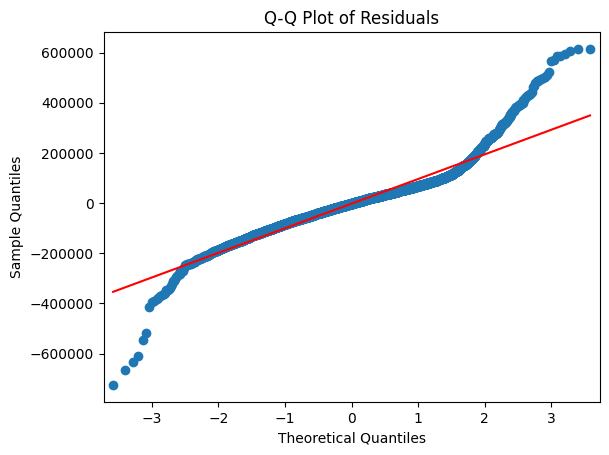

In [1314]:
residuals_lasso = y_test - lasso_pred
sm.qqplot(residuals_lasso, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [1315]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1, l1_ratio=0.8))
])
elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))


109538.12419029196

Most of the alpha values tested resulted in higher values compared to both Lasso and Ridge techniques, indicating that they didn't produce significant changes or improvements.

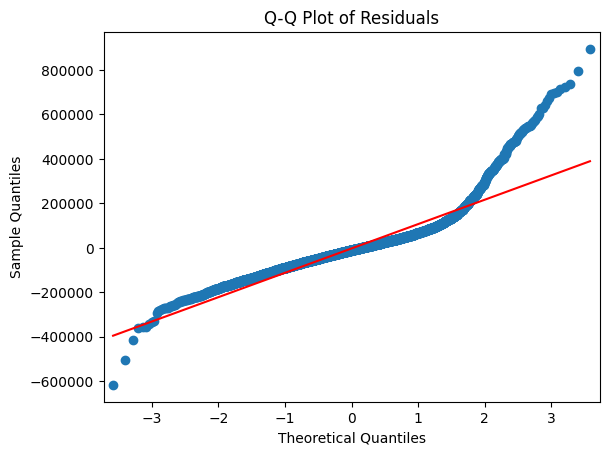

In [1316]:
residuals_enet = y_test - elasticnet_pred
sm.qqplot(residuals_enet, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()